In [1]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

boston = load_boston()
df = pd.DataFrame(boston.data, columns = boston.feature_names)

df['PRICE'] = boston.target
y_target = df['PRICE']
X_data = df.drop(['PRICE'], axis=1)

rf = RandomForestRegressor(random_state=0, n_estimators=1000)
neg_mse_scores = cross_val_score(rf, X_data, y_target, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(np.round(neg_mse_scores, 2))
print(np.round(rmse_scores, 2))
print(round(avg_rmse, 3))

/home/gw/anaconda3/envs/studying/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/gw/anaconda3/envs/studying/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib

[ -7.88 -13.14 -20.57 -46.23 -18.88]
[2.81 3.63 4.54 6.8  4.34]
4.423


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

def plot_feature_importances(model, X_data, y_target):
    model.fit(X_data, y_target)
    
    feature_series = pd.Series(data=model.feature_importances_, index=X_data.columns)
    feature_series = feature_series.sort_values(ascending=False)
    sns.barplot(x=feature_series, y=feature_series.index)
    plt.show()

def get_model_cv_prediction(model, X_data, y_target):
    neg_mse_scores = cross_val_score(model, X_data, y_target, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('Mean RMSE :', round(avg_rmse, 3))
    plot_feature_importances(model, X_data, y_target)

Mean RMSE : 5.978


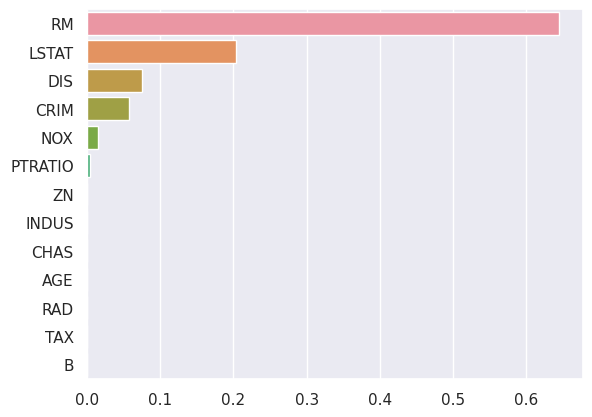

Mean RMSE : 4.423


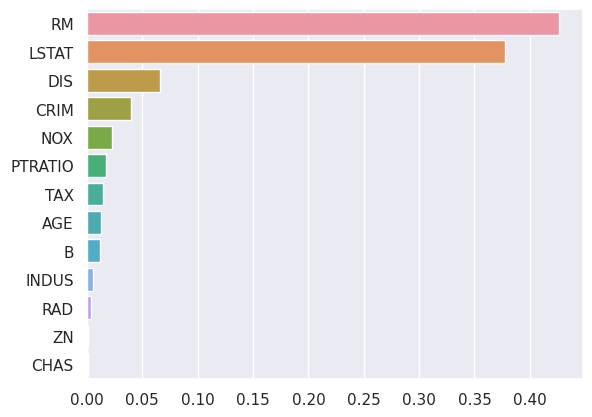

Mean RMSE : 4.269


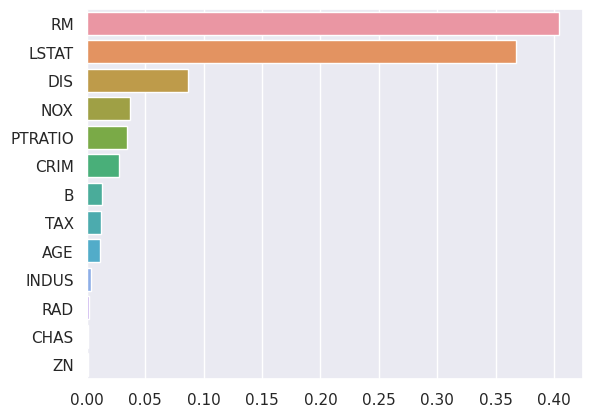

/home/gw/anaconda3/envs/studying/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/gw/anaconda3/envs/studying/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/gw/anaconda3/envs/studying/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/gw/anaconda3/envs/studying/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pan

Mean RMSE : 4.251


/home/gw/anaconda3/envs/studying/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


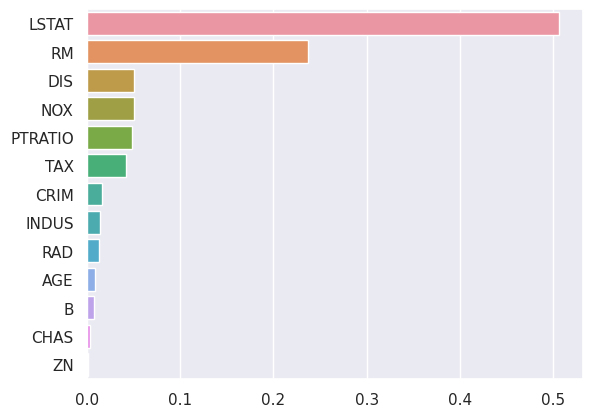

Mean RMSE : 4.646


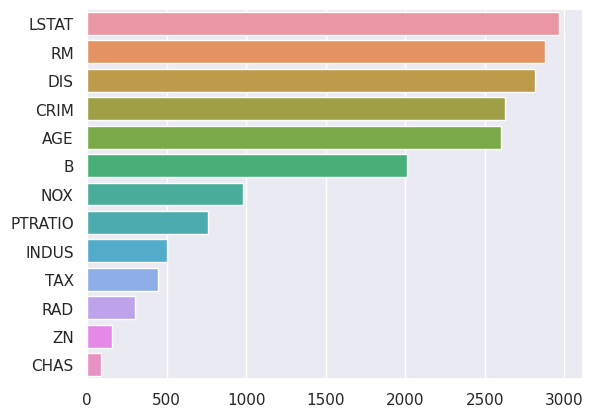

In [12]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)
xgb_reg = XGBRegressor(n_estimators=1000)
lgb_reg = LGBMRegressor(n_estimators=1000)

models = [dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]
for model in models:
    get_model_cv_prediction(model, X_data, y_target)

(100, 2)


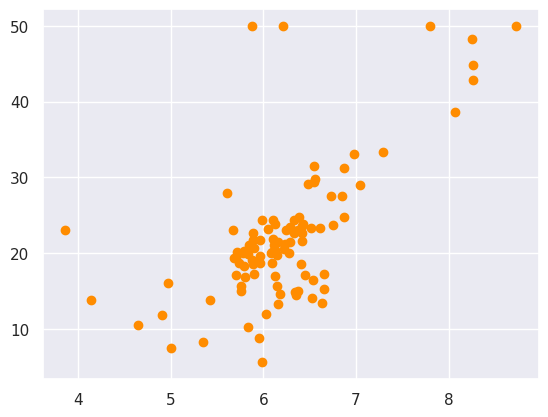

In [19]:
df_sample = df[['RM', 'PRICE']]
df_sample = df_sample.sample(n=100, random_state=0)
print(df_sample.shape)
plt.figure()
plt.scatter(df_sample.RM, df_sample.PRICE, c='darkorange')

In [22]:
import numpy as np
from sklearn.linear_model import LinearRegression

lr_reg = LinearRegression()
dt_reg2 = DecisionTreeRegressor(max_depth=2)
dt_reg7 = DecisionTreeRegressor(max_depth=7)

X_test = np.arange(4.5, 8.5, 0.04).reshape(-1, 1)

X_feature = df_sample['RM'].values.reshape(-1, 1)
y_target = df_sample['PRICE'].values.reshape(-1, 1)

lr_reg.fit(X_feature, y_target)
dt_reg2.fit(X_feature, y_target)
dt_reg7.fit(X_feature, y_target)

pred_lr = lr_reg.predict(X_test)
pred_dt2 = dt_reg2.predict(X_test)
pred_dt7 = dt_reg7.predict(X_test)

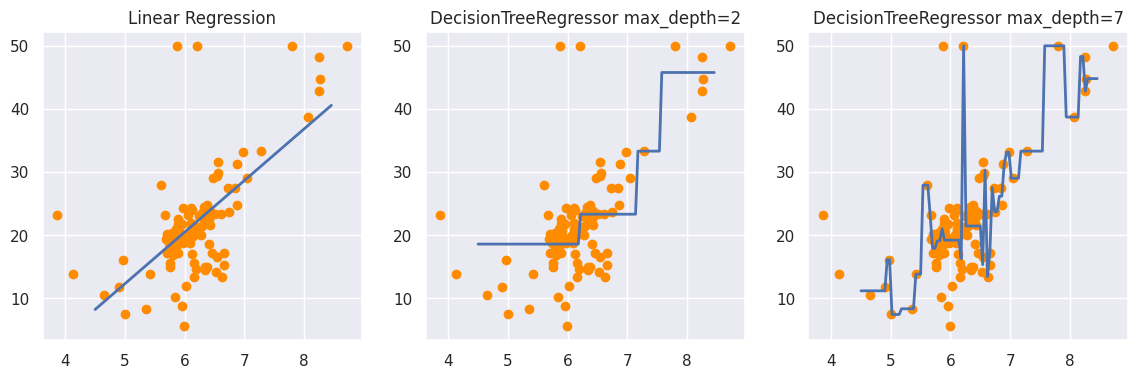

In [24]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(14, 4), ncols=3)

ax1.set_title('Linear Regression')
ax1.scatter(df_sample.RM, df_sample.PRICE, c='darkorange')
ax1.plot(X_test, pred_lr, label='linear', linewidth=2)

ax2.set_title('DecisionTreeRegressor max_depth=2')
ax2.scatter(df_sample.RM, df_sample.PRICE, c='darkorange')
ax2.plot(X_test, pred_dt2, label='linear', linewidth=2)

ax3.set_title('DecisionTreeRegressor max_depth=7')
ax3.scatter(df_sample.RM, df_sample.PRICE, c='darkorange')
ax3.plot(X_test, pred_dt7, label='linear', linewidth=2)